In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

red = pd.read_csv("C:/python3/data/winequality-red.csv")

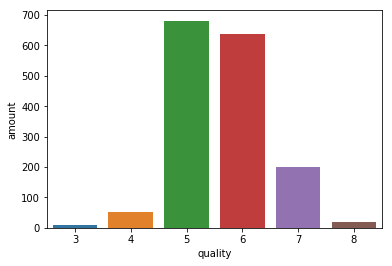

In [2]:
# 각 등급별 개수 확인
quals = red['quality'].value_counts().sort_index()

plt.rcParams['figure.figsize'] = [6,4]
sns.barplot(quals.index, quals.values)
plt.xlabel('quality')
plt.ylabel('amount')
plt.show()

In [3]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

|feature|특성|　　|feature|특성|
|:---:|:---:|:---:|:---:|:---:|
|fixed acidity|고정 산도|　　|volatile acidity|휘발성 산도|
|citric acid|시트르산(구연산)|　　|residual sugar|잔류 당|
|chlorides|염화물|　　|free sulfur dioxide|유리아황산|
|total sulfur dioxide|이산화황 총량|　　|density|밀도|
|pH|산도(수소이온농도)|　　|sulphates|황산염|
|alcohol|알코올 도수|　　|quality|품질|

In [4]:
# 스케일링 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
X = red[red.columns.difference(['quality'])]
X.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [5]:
scaler.fit(X)
X_scaled = scaler.transform(X)

In [6]:
X_scaled = pd.DataFrame(X_scaled)

In [7]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.338028,0.362205,0.116438,0.209581,0.215548,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.197183,0.409449,0.095890,0.191617,0.169611,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.225352,0.330709,0.068493,0.149701,0.190813,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260


In [8]:
X_scaled.columns = X.columns
X_scaled.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.338028,0.362205,0.116438,0.209581,0.215548,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.197183,0.409449,0.095890,0.191617,0.169611,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.225352,0.330709,0.068493,0.149701,0.190813,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260


In [9]:
import statsmodels.api as sm
y = red['quality']

X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Fri, 28 May 2021   Prob (F-statistic):          1.79e-145
Time:                        11:04:22   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7126      0.151     37.846      0.000       5.416       6.009
alcohol                  1.7953      0.172     10.429      0.000       1.458       2.133
chlorides               -1.1227      0.251     -4.470      0.000      -1.615      -0.630
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
density                 -0.2435      0.295     -0.827      0.409      -0.821       0.334
fixed acidity            0.2824      0.293      0.963      0.336      -0.293       0.858
free sulfur dioxide      0.3097      0.154      2.009      0.045       0.007       0.612
pH                      -0.5253      0.243     -2.159      0.031      -1.003      -0.048
residual sugar           0.2384      0.219      1.089      0.276      -0.191       0.668
sulphates                1.5303      0.191      8.014      0.000       1.156       1.905
total sulfur dioxide    -0.9239      0.206     -4.480      0.000      -1.328      -0.519
volatile acidity        -1.5820      0.177     -8.948      0.000      -1.929      -1.235
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

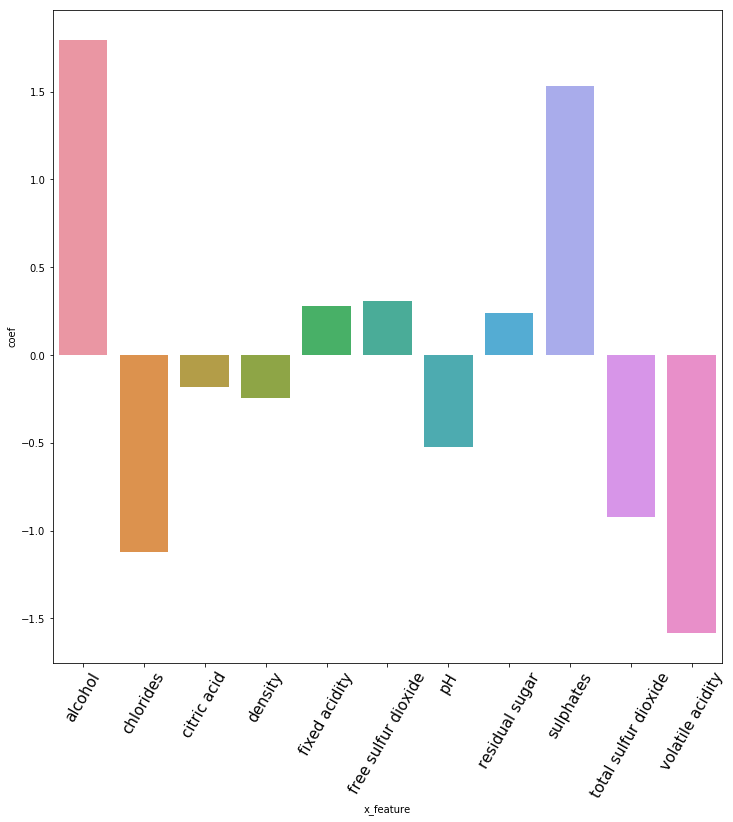

In [10]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [12,12]
coefs = model.params.tolist()[1:]      # params = parameters
coef_series = pd.Series(coefs)

x_labels = model.params.index.tolist()[1:]

# ax = coef_series.plot(kind = 'bar')
ax = sns.barplot(x_labels,coef_series)
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=60, fontsize=15)
plt.show()

In [11]:
# 회귀분석의 예측 성능을 높이기 위한 방법 : 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif['feature'] = X_scaled.columns
vif.round(1)

,VIF Factor,feature
0,86.8,const
1,3.0,alcohol
2,1.5,chlorides
3,3.1,citric acid
4,6.3,density
5,7.8,fixed acidity
6,2.0,free sulfur dioxide
7,3.3,pH
8,1.7,residual sugar
9,1.4,sulphates


### 다중공선성 확인결과
#### VIF Factor 계수가 10을 넘는 것이 없으므로, 삭제할 피처가 없음

In [12]:
vif[1:]

,VIF Factor,feature
1,3.031160,alcohol
2,1.481932,chlorides
3,3.128022,citric acid
4,6.343760,density
5,7.767512,fixed acidity
6,1.963019,free sulfur dioxide
7,3.329732,pH
8,1.702588,residual sugar
9,1.429434,sulphates
10,2.186813,total sulfur dioxide


In [13]:
corr = vif[1:].corr()
corr

,VIF Factor
VIF Factor,1.0


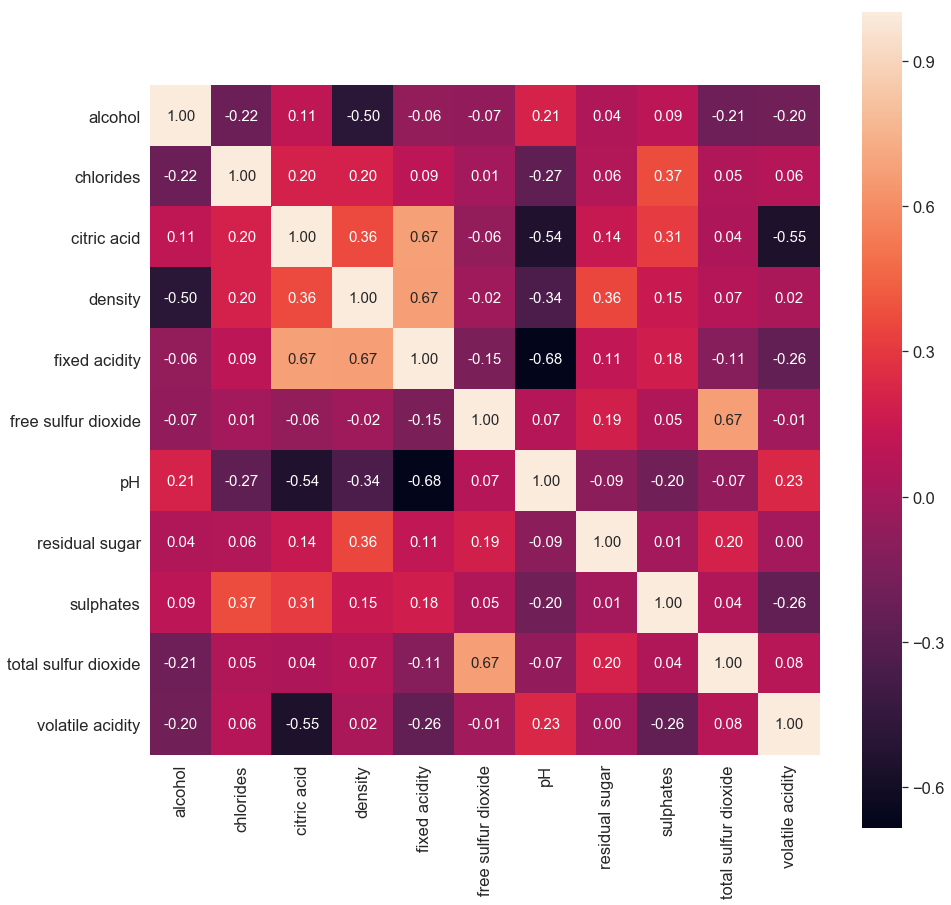

In [14]:
scale_columns = X_scaled.columns[1:]

corr = X_scaled[scale_columns].corr(method='pearson')
show_cols = X_scaled.columns[1:]

plt.rcParams['figure.figsize'] = [15, 15]
plt.rc('font', family='Malgun Gothic')
sns.set(font_scale=1.5)       # 폰트 비율
hm = sns.heatmap(corr.values,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=show_cols,
                xticklabels=show_cols)
plt.show()

### 서로에 대한 관계만 있고 다른 피처들과는 관계가 없는 'free sulfur dioxide','total sulfur dioxide' 제거

In [15]:
X_scaled = X_scaled[X_scaled.columns.difference(['const','free sulfur dioxide','total sulfur dioxide'])]
X_scaled.head()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity
0,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.362205,0.116438,0.209581,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.409449,0.095890,0.191617,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.330709,0.068493,0.149701,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260


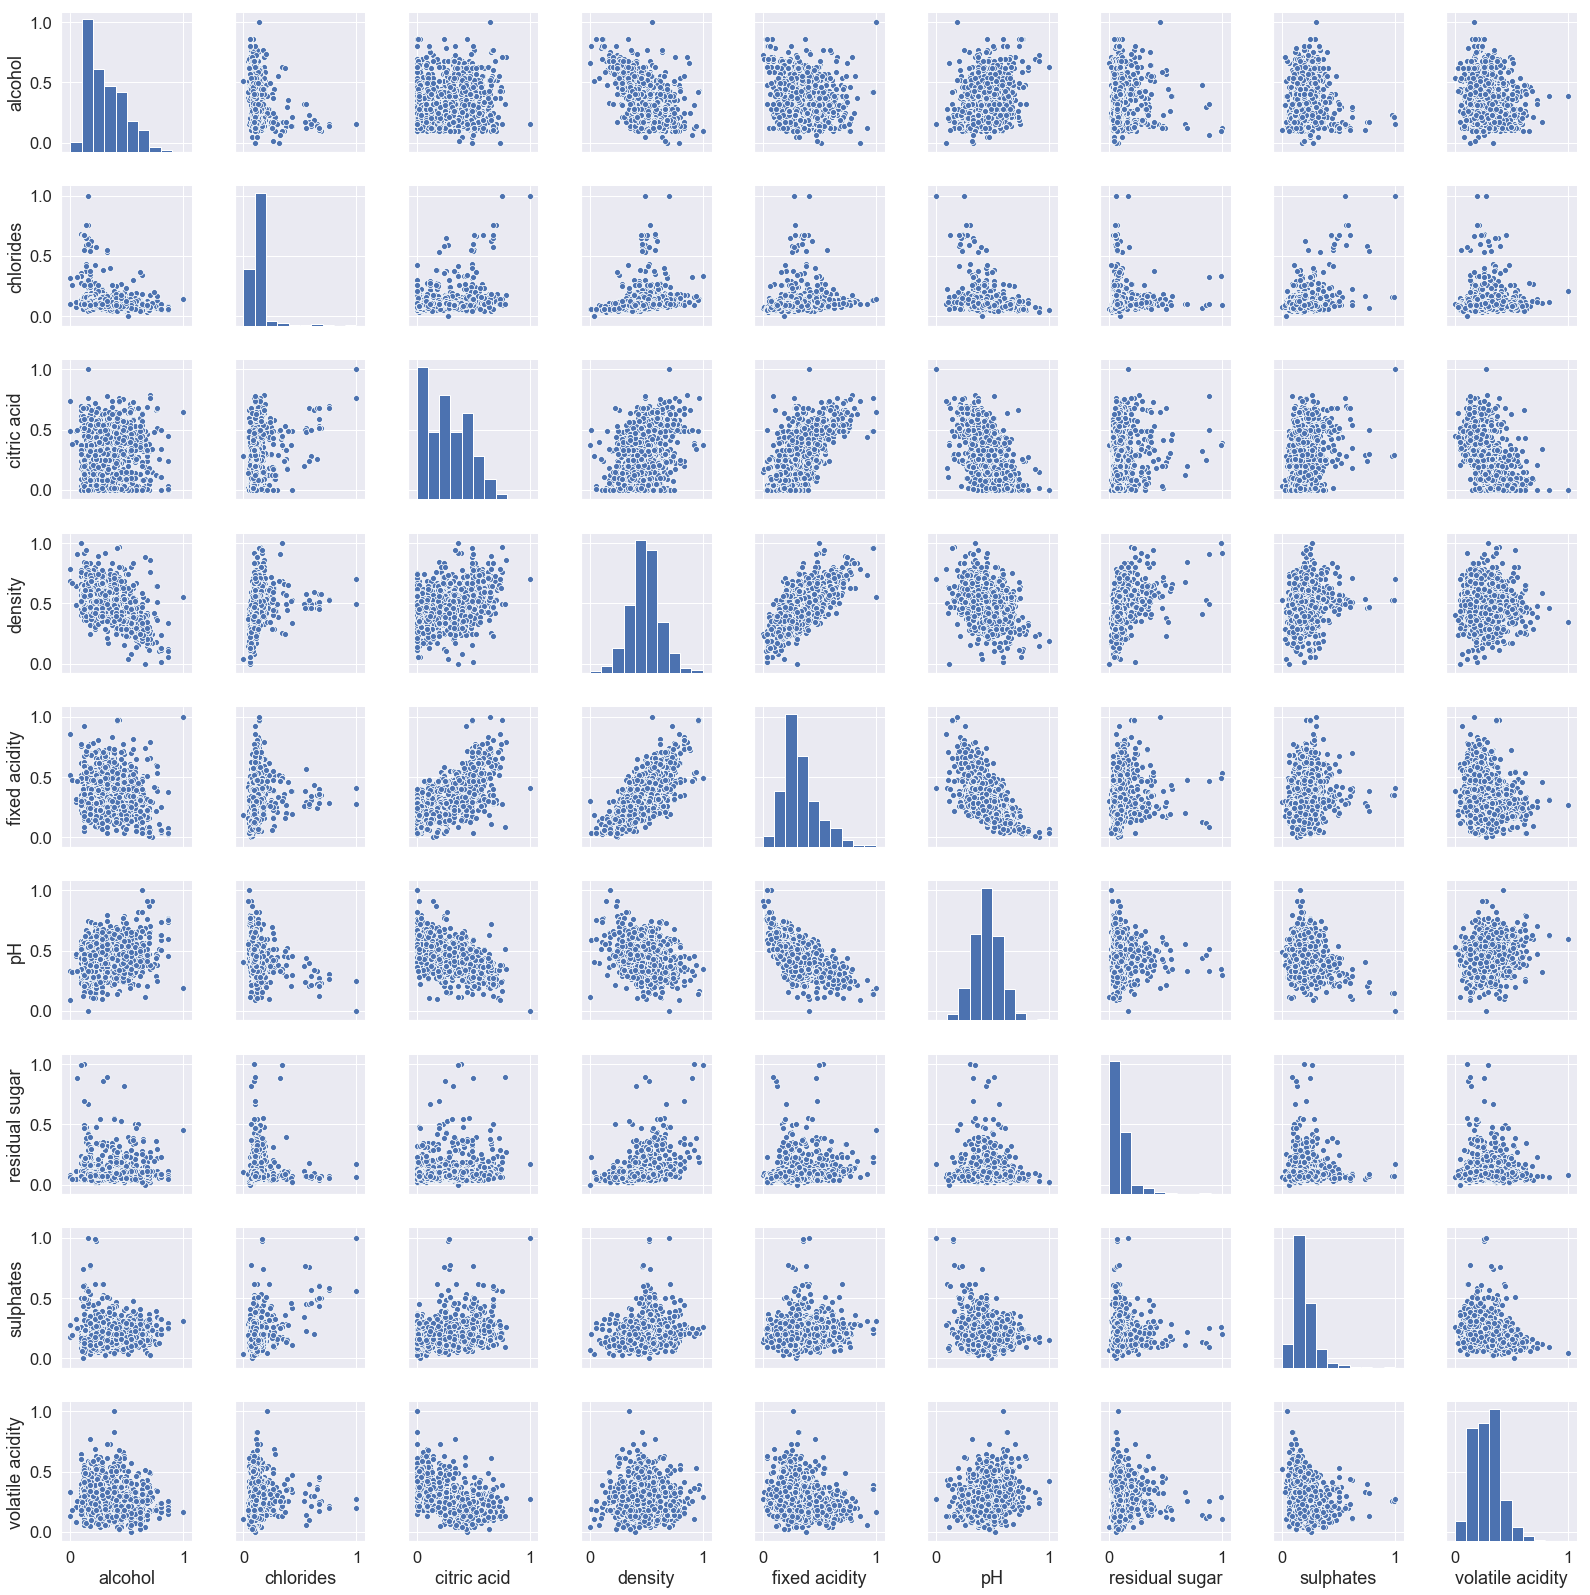

In [16]:
sns.pairplot(X_scaled)
plt.show()

'fixed acidity' : '고정 산도', 　　'volatile acidity' :'휘발성 산도', 　　'citric acid' '구연산',<br>
'residual sugar': '잔류 당',　　　'chlorides': '염화물, 　　　'free sulfur dioxide':'유리아황산',<br>
'total sulfur dioxide':'총 이산화황',　'density': '밀도', 　　　　　　　　'pH':'pH', <br>
'sulphates':'황산염', 　　　　　　　'alcohol': '알코올', 　　　　　　'quality' :'품질'

In [17]:
red_final = red[red.columns.difference(['free sulfur dioxide','total sulfur dioxide'])]
red_final.tail()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,quality,residual sugar,sulphates,volatile acidity
1594,10.5,0.090,0.08,0.99490,6.2,3.45,5,2.0,0.58,0.600
1595,11.2,0.062,0.10,0.99512,5.9,3.52,6,2.2,0.76,0.550
1596,11.0,0.076,0.13,0.99574,6.3,3.42,6,2.3,0.75,0.510
1597,10.2,0.075,0.12,0.99547,5.9,3.57,5,2.0,0.71,0.645
1598,11.0,0.067,0.47,0.99549,6.0,3.39,6,3.6,0.66,0.310


In [18]:
red_final = red_final[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'pH',
                      'residual sugar', 'sulphates', 'volatile acidity', 'quality']]
red_final.tail()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity,quality
1594,10.5,0.090,0.08,0.99490,6.2,3.45,2.0,0.58,0.600,5
1595,11.2,0.062,0.10,0.99512,5.9,3.52,2.2,0.76,0.550,6
1596,11.0,0.076,0.13,0.99574,6.3,3.42,2.3,0.75,0.510,6
1597,10.2,0.075,0.12,0.99547,5.9,3.57,2.0,0.71,0.645,5
1598,11.0,0.067,0.47,0.99549,6.0,3.39,3.6,0.66,0.310,6


In [19]:
def fc(data):
    if data > 5:
        return 1
    return 0
red_final['quality'] = red_final['quality'].apply(fc)

- 정규화 안한거 - red_final
- 정규화(품질 빼고) - X_scaled

## 머신러닝과 딥러닝 

In [20]:
red_final[red_final.columns[:-1]][-5:]

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity
1594,10.5,0.090,0.08,0.99490,6.2,3.45,2.0,0.58,0.600
1595,11.2,0.062,0.10,0.99512,5.9,3.52,2.2,0.76,0.550
1596,11.0,0.076,0.13,0.99574,6.3,3.42,2.3,0.75,0.510
1597,10.2,0.075,0.12,0.99547,5.9,3.57,2.0,0.71,0.645
1598,11.0,0.067,0.47,0.99549,6.0,3.39,3.6,0.66,0.310


## ANN
- 원본데이터로 이용하여 ANN
- 정제데이터로 이용하여 ANN

### 원본데이터로 이용하여 ANN

In [21]:
# 시각화 한글 처리
import matplotlib as mpl

# 폰트 설정
mpl.rc('font', family = 'NanumGothic')

# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

In [22]:
# 데이터 로딩
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

red = pd.read_csv("C:/python3/data/winequality-red.csv")

In [23]:
def fc(data):
    if data > 5:
        return 1
    return 0
red['quality'] = red['quality'].apply(fc)

In [24]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 데이터 로딩
X_data = red[red.columns[:-1]].values
y_data = red['quality'].values

# train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state = 42)

In [25]:
from tensorflow import keras
# train_scaled, val_scaled, train_target, val_target = train_test_split(X_train, y_train,
#                                                                      test_size = 0.2, random_state = 42)
# 원본데이터 모델
model_r = keras.Sequential()
model_r.add(keras.layers.Dense(20, activation = 'softmax', input_dim = 11))

In [26]:
model_r.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

In [27]:
history = model_r.fit(X_train, y_train, epochs= 1000, batch_size = 64,
                    callbacks= [checkpoint_cb, early_stopping_cb],
                    validation_split = 0.2)
                    #validation_data=(val_scaled, val_target))

Train on 1023 samples, validate on 256 samples
Epoch 1/1000
1023/1023 [==============================] - 1s 587us/sample - loss: 22.4162 - accuracy: 0.0000e+00 - val_loss: 20.2945 - val_accuracy: 0.0000e+00
Epoch 2/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 19.5729 - accuracy: 0.0000e+00 - val_loss: 17.4669 - val_accuracy: 0.0000e+00
Epoch 3/1000
1023/1023 [==============================] - 0s 36us/sample - loss: 16.7360 - accuracy: 0.0000e+00 - val_loss: 14.6451 - val_accuracy: 0.0000e+00
Epoch 4/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 13.9191 - accuracy: 9.7752e-04 - val_loss: 11.8736 - val_accuracy: 0.0039
Epoch 5/1000
1023/1023 [==============================] - 0s 40us/sample - loss: 11.2061 - accuracy: 0.0215 - val_loss: 9.2883 - val_accuracy: 0.0586
Epoch 6/1000
1023/1023 [==============================] - 0s 43us/sample - loss: 8.7514 - accuracy: 0.0880 - val_loss: 7.1252 - val_accuracy: 0.1328
Epoch 7/1000
1023/102

Epoch 55/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 0.6028 - accuracy: 0.6676 - val_loss: 0.5968 - val_accuracy: 0.6875
Epoch 56/1000
1023/1023 [==============================] - 0s 42us/sample - loss: 0.6013 - accuracy: 0.6667 - val_loss: 0.5927 - val_accuracy: 0.6367
Epoch 57/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.6019 - accuracy: 0.6706 - val_loss: 0.5923 - val_accuracy: 0.6484
Epoch 58/1000
1023/1023 [==============================] - 0s 39us/sample - loss: 0.6013 - accuracy: 0.6696 - val_loss: 0.5922 - val_accuracy: 0.6719
Epoch 59/1000
1023/1023 [==============================] - 0s 39us/sample - loss: 0.6004 - accuracy: 0.6716 - val_loss: 0.5913 - val_accuracy: 0.6758
Epoch 60/1000
1023/1023 [==============================] - 0s 38us/sample - loss: 0.6002 - accuracy: 0.6676 - val_loss: 0.5910 - val_accuracy: 0.6758
Epoch 61/1000
1023/1023 [==============================] - 0s 42us/sample - loss: 0.6003 - accuracy:

In [28]:
model_r.evaluate(X_test, y_test, verbose=0)

[0.5683408051729202, 0.71875]

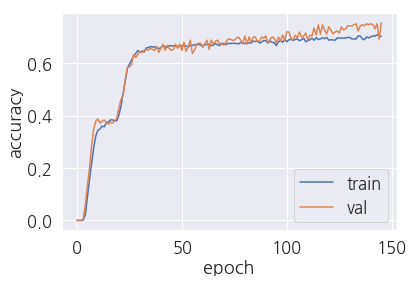

In [29]:
# 훈련소실과 검증손실 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

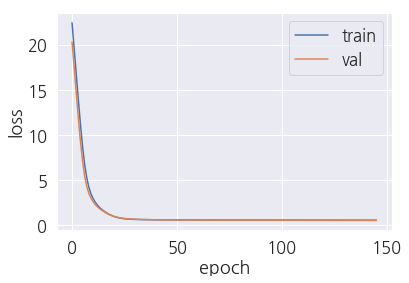

In [30]:
# 훈련소실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 정제데이터를 이용한 ANN

In [61]:
# 데이터 로딩
X_data = X_scaled.values
#X_data = red_final[red_final.columns[:-1]].values
y_data = red_final['quality'].values

# train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state = 42)

In [62]:
# # 검증데이터
# train_scaled, val_scaled, train_target, val_target = train_test_split(X_train, y_train,
#                                                                      test_size = 0.2,          
#                                                                      random_state = 42)

# 정제데이터 모델
model_c = keras.Sequential()
model_c.add(keras.layers.Dense(20, activation = 'softmax', input_dim = 9))

In [63]:
model_c.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

In [64]:
history = model_c.fit(X_train, y_train, epochs= 1000, batch_size = 64, 
                    #validation_data=(val_scaled, val_target),
                    validation_split = 0.2,
                    callbacks= [checkpoint_cb, early_stopping_cb])            

Train on 1023 samples, validate on 256 samples
Epoch 1/1000
1023/1023 [==============================] - 0s 246us/sample - loss: 3.1010 - accuracy: 0.0039 - val_loss: 3.0436 - val_accuracy: 0.0273
Epoch 2/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 2.9986 - accuracy: 0.0870 - val_loss: 2.9414 - val_accuracy: 0.1758
Epoch 3/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 2.8977 - accuracy: 0.2385 - val_loss: 2.8408 - val_accuracy: 0.3320
Epoch 4/1000
1023/1023 [==============================] - 0s 38us/sample - loss: 2.7986 - accuracy: 0.3705 - val_loss: 2.7422 - val_accuracy: 0.4258
Epoch 5/1000
1023/1023 [==============================] - 0s 38us/sample - loss: 2.7015 - accuracy: 0.4477 - val_loss: 2.6458 - val_accuracy: 0.4805
Epoch 6/1000
1023/1023 [==============================] - 0s 36us/sample - loss: 2.6067 - accuracy: 0.5015 - val_loss: 2.5516 - val_accuracy: 0.4961
Epoch 7/1000
1023/1023 [==============================] - 

Epoch 55/1000
1023/1023 [==============================] - 0s 33us/sample - loss: 0.8639 - accuracy: 0.5533 - val_loss: 0.8487 - val_accuracy: 0.5742
Epoch 56/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.8573 - accuracy: 0.5562 - val_loss: 0.8423 - val_accuracy: 0.5781
Epoch 57/1000
1023/1023 [==============================] - 0s 33us/sample - loss: 0.8512 - accuracy: 0.5552 - val_loss: 0.8361 - val_accuracy: 0.5898
Epoch 58/1000
1023/1023 [==============================] - 0s 34us/sample - loss: 0.8453 - accuracy: 0.5630 - val_loss: 0.8302 - val_accuracy: 0.5938
Epoch 59/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 0.8396 - accuracy: 0.5640 - val_loss: 0.8245 - val_accuracy: 0.5977
Epoch 60/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 0.8341 - accuracy: 0.5660 - val_loss: 0.8190 - val_accuracy: 0.5938
Epoch 61/1000
1023/1023 [==============================] - 0s 39us/sample - loss: 0.8289 - accuracy:

1023/1023 [==============================] - 0s 37us/sample - loss: 0.6979 - accuracy: 0.6500 - val_loss: 0.6746 - val_accuracy: 0.7188
Epoch 110/1000
1023/1023 [==============================] - 0s 47us/sample - loss: 0.6964 - accuracy: 0.6510 - val_loss: 0.6727 - val_accuracy: 0.7188
Epoch 111/1000
1023/1023 [==============================] - 0s 51us/sample - loss: 0.6948 - accuracy: 0.6500 - val_loss: 0.6710 - val_accuracy: 0.7188
Epoch 112/1000
1023/1023 [==============================] - 0s 44us/sample - loss: 0.6934 - accuracy: 0.6520 - val_loss: 0.6693 - val_accuracy: 0.7188
Epoch 113/1000
1023/1023 [==============================] - 0s 50us/sample - loss: 0.6919 - accuracy: 0.6628 - val_loss: 0.6677 - val_accuracy: 0.7227
Epoch 114/1000
1023/1023 [==============================] - 0s 44us/sample - loss: 0.6905 - accuracy: 0.6628 - val_loss: 0.6659 - val_accuracy: 0.7227
Epoch 115/1000
1023/1023 [==============================] - 0s 43us/sample - loss: 0.6890 - accuracy: 0.6608 

1023/1023 [==============================] - 0s 41us/sample - loss: 0.6379 - accuracy: 0.6901 - val_loss: 0.6022 - val_accuracy: 0.7773
Epoch 164/1000
1023/1023 [==============================] - 0s 38us/sample - loss: 0.6371 - accuracy: 0.6911 - val_loss: 0.6012 - val_accuracy: 0.7773
Epoch 165/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.6363 - accuracy: 0.6901 - val_loss: 0.6002 - val_accuracy: 0.7773
Epoch 166/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.6355 - accuracy: 0.6931 - val_loss: 0.5992 - val_accuracy: 0.7734
Epoch 167/1000
1023/1023 [==============================] - 0s 34us/sample - loss: 0.6347 - accuracy: 0.6911 - val_loss: 0.5982 - val_accuracy: 0.7773
Epoch 168/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.6339 - accuracy: 0.6921 - val_loss: 0.5972 - val_accuracy: 0.7773
Epoch 169/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.6332 - accuracy: 0.6940 

1023/1023 [==============================] - 0s 50us/sample - loss: 0.6044 - accuracy: 0.7087 - val_loss: 0.5584 - val_accuracy: 0.7812
Epoch 218/1000
1023/1023 [==============================] - 0s 53us/sample - loss: 0.6039 - accuracy: 0.7077 - val_loss: 0.5579 - val_accuracy: 0.7773
Epoch 219/1000
1023/1023 [==============================] - 0s 48us/sample - loss: 0.6035 - accuracy: 0.7077 - val_loss: 0.5572 - val_accuracy: 0.7773
Epoch 220/1000
1023/1023 [==============================] - 0s 51us/sample - loss: 0.6030 - accuracy: 0.7067 - val_loss: 0.5566 - val_accuracy: 0.7734
Epoch 221/1000
1023/1023 [==============================] - 0s 48us/sample - loss: 0.6025 - accuracy: 0.7048 - val_loss: 0.5560 - val_accuracy: 0.7773
Epoch 222/1000
1023/1023 [==============================] - 0s 42us/sample - loss: 0.6021 - accuracy: 0.7097 - val_loss: 0.5553 - val_accuracy: 0.7812
Epoch 223/1000
1023/1023 [==============================] - 0s 40us/sample - loss: 0.6016 - accuracy: 0.7107 

1023/1023 [==============================] - 0s 48us/sample - loss: 0.5846 - accuracy: 0.7097 - val_loss: 0.5313 - val_accuracy: 0.7891
Epoch 272/1000
1023/1023 [==============================] - 0s 45us/sample - loss: 0.5843 - accuracy: 0.7097 - val_loss: 0.5309 - val_accuracy: 0.7891
Epoch 273/1000
1023/1023 [==============================] - 0s 45us/sample - loss: 0.5841 - accuracy: 0.7097 - val_loss: 0.5305 - val_accuracy: 0.7891
Epoch 274/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 0.5838 - accuracy: 0.7107 - val_loss: 0.5301 - val_accuracy: 0.7891
Epoch 275/1000
1023/1023 [==============================] - 0s 33us/sample - loss: 0.5835 - accuracy: 0.7107 - val_loss: 0.5297 - val_accuracy: 0.7891
Epoch 276/1000
1023/1023 [==============================] - 0s 42us/sample - loss: 0.5832 - accuracy: 0.7107 - val_loss: 0.5293 - val_accuracy: 0.7891
Epoch 277/1000
1023/1023 [==============================] - 0s 46us/sample - loss: 0.5830 - accuracy: 0.7107 

1023/1023 [==============================] - 0s 35us/sample - loss: 0.5724 - accuracy: 0.7175 - val_loss: 0.5140 - val_accuracy: 0.7891
Epoch 326/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 0.5723 - accuracy: 0.7165 - val_loss: 0.5137 - val_accuracy: 0.7891
Epoch 327/1000
1023/1023 [==============================] - 0s 42us/sample - loss: 0.5721 - accuracy: 0.7165 - val_loss: 0.5135 - val_accuracy: 0.7891
Epoch 328/1000
1023/1023 [==============================] - 0s 43us/sample - loss: 0.5719 - accuracy: 0.7175 - val_loss: 0.5132 - val_accuracy: 0.7891
Epoch 329/1000
1023/1023 [==============================] - 0s 43us/sample - loss: 0.5717 - accuracy: 0.7165 - val_loss: 0.5130 - val_accuracy: 0.7891
Epoch 330/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 0.5716 - accuracy: 0.7175 - val_loss: 0.5128 - val_accuracy: 0.7891
Epoch 331/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.5716 - accuracy: 0.7165 

1023/1023 [==============================] - 0s 46us/sample - loss: 0.5648 - accuracy: 0.7175 - val_loss: 0.5030 - val_accuracy: 0.7734
Epoch 380/1000
1023/1023 [==============================] - 0s 45us/sample - loss: 0.5647 - accuracy: 0.7165 - val_loss: 0.5029 - val_accuracy: 0.7734
Epoch 381/1000
1023/1023 [==============================] - 0s 39us/sample - loss: 0.5645 - accuracy: 0.7175 - val_loss: 0.5027 - val_accuracy: 0.7695
Epoch 382/1000
1023/1023 [==============================] - 0s 40us/sample - loss: 0.5644 - accuracy: 0.7155 - val_loss: 0.5025 - val_accuracy: 0.7695
Epoch 383/1000
1023/1023 [==============================] - 0s 39us/sample - loss: 0.5643 - accuracy: 0.7165 - val_loss: 0.5023 - val_accuracy: 0.7734
Epoch 384/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 0.5642 - accuracy: 0.7175 - val_loss: 0.5022 - val_accuracy: 0.7695
Epoch 385/1000
1023/1023 [==============================] - 0s 45us/sample - loss: 0.5642 - accuracy: 0.7175 

1023/1023 [==============================] - 0s 36us/sample - loss: 0.5597 - accuracy: 0.7224 - val_loss: 0.4960 - val_accuracy: 0.7773
Epoch 434/1000
1023/1023 [==============================] - 0s 39us/sample - loss: 0.5597 - accuracy: 0.7234 - val_loss: 0.4959 - val_accuracy: 0.7812
Epoch 435/1000
1023/1023 [==============================] - 0s 44us/sample - loss: 0.5596 - accuracy: 0.7214 - val_loss: 0.4958 - val_accuracy: 0.7773
Epoch 436/1000
1023/1023 [==============================] - 0s 43us/sample - loss: 0.5595 - accuracy: 0.7224 - val_loss: 0.4957 - val_accuracy: 0.7812
Epoch 437/1000
1023/1023 [==============================] - 0s 33us/sample - loss: 0.5594 - accuracy: 0.7214 - val_loss: 0.4956 - val_accuracy: 0.7812
Epoch 438/1000
1023/1023 [==============================] - 0s 33us/sample - loss: 0.5594 - accuracy: 0.7224 - val_loss: 0.4955 - val_accuracy: 0.7812
Epoch 439/1000
1023/1023 [==============================] - 0s 34us/sample - loss: 0.5593 - accuracy: 0.7214 

1023/1023 [==============================] - 0s 40us/sample - loss: 0.5563 - accuracy: 0.7204 - val_loss: 0.4914 - val_accuracy: 0.7773
Epoch 488/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 0.5563 - accuracy: 0.7214 - val_loss: 0.4914 - val_accuracy: 0.7852
Epoch 489/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 0.5562 - accuracy: 0.7214 - val_loss: 0.4913 - val_accuracy: 0.7773
Epoch 490/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.5562 - accuracy: 0.7204 - val_loss: 0.4912 - val_accuracy: 0.7812
Epoch 491/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.5562 - accuracy: 0.7214 - val_loss: 0.4912 - val_accuracy: 0.7852
Epoch 492/1000
1023/1023 [==============================] - 0s 42us/sample - loss: 0.5561 - accuracy: 0.7204 - val_loss: 0.4911 - val_accuracy: 0.7773
Epoch 493/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 0.5560 - accuracy: 0.7204 

1023/1023 [==============================] - 0s 36us/sample - loss: 0.5539 - accuracy: 0.7204 - val_loss: 0.4884 - val_accuracy: 0.7852
Epoch 542/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 0.5538 - accuracy: 0.7204 - val_loss: 0.4883 - val_accuracy: 0.7852
Epoch 543/1000
1023/1023 [==============================] - 0s 38us/sample - loss: 0.5539 - accuracy: 0.7204 - val_loss: 0.4884 - val_accuracy: 0.7852
Epoch 544/1000
1023/1023 [==============================] - 0s 37us/sample - loss: 0.5537 - accuracy: 0.7204 - val_loss: 0.4883 - val_accuracy: 0.7852
Epoch 545/1000
1023/1023 [==============================] - 0s 36us/sample - loss: 0.5537 - accuracy: 0.7204 - val_loss: 0.4882 - val_accuracy: 0.7852
Epoch 546/1000
1023/1023 [==============================] - 0s 36us/sample - loss: 0.5537 - accuracy: 0.7204 - val_loss: 0.4881 - val_accuracy: 0.7852
Epoch 547/1000
1023/1023 [==============================] - 0s 38us/sample - loss: 0.5537 - accuracy: 0.7204 

Epoch 595/1000
1023/1023 [==============================] - 0s 36us/sample - loss: 0.5521 - accuracy: 0.7195 - val_loss: 0.4863 - val_accuracy: 0.7852
Epoch 596/1000
1023/1023 [==============================] - 0s 35us/sample - loss: 0.5522 - accuracy: 0.7204 - val_loss: 0.4862 - val_accuracy: 0.7852
Epoch 597/1000
1023/1023 [==============================] - 0s 39us/sample - loss: 0.5521 - accuracy: 0.7195 - val_loss: 0.4862 - val_accuracy: 0.7852
Epoch 598/1000
1023/1023 [==============================] - ETA: 0s - loss: 0.5189 - accuracy: 0.73 - 0s 37us/sample - loss: 0.5520 - accuracy: 0.7195 - val_loss: 0.4862 - val_accuracy: 0.7852
Epoch 599/1000
1023/1023 [==============================] - 0s 31us/sample - loss: 0.5521 - accuracy: 0.7204 - val_loss: 0.4861 - val_accuracy: 0.7852
Epoch 600/1000
1023/1023 [==============================] - 0s 44us/sample - loss: 0.5520 - accuracy: 0.7204 - val_loss: 0.4862 - val_accuracy: 0.7852
Epoch 601/1000
1023/1023 [==========================

Epoch 649/1000
1023/1023 [==============================] - 0s 40us/sample - loss: 0.5507 - accuracy: 0.7224 - val_loss: 0.4848 - val_accuracy: 0.7852
Epoch 650/1000
1023/1023 [==============================] - 0s 40us/sample - loss: 0.5508 - accuracy: 0.7224 - val_loss: 0.4848 - val_accuracy: 0.7852
Epoch 651/1000
1023/1023 [==============================] - 0s 42us/sample - loss: 0.5507 - accuracy: 0.7224 - val_loss: 0.4848 - val_accuracy: 0.7852
Epoch 652/1000
1023/1023 [==============================] - 0s 40us/sample - loss: 0.5507 - accuracy: 0.7224 - val_loss: 0.4848 - val_accuracy: 0.7852
Epoch 653/1000
1023/1023 [==============================] - 0s 41us/sample - loss: 0.5507 - accuracy: 0.7204 - val_loss: 0.4848 - val_accuracy: 0.7852
Epoch 654/1000
1023/1023 [==============================] - 0s 43us/sample - loss: 0.5507 - accuracy: 0.7224 - val_loss: 0.4847 - val_accuracy: 0.7852
Epoch 655/1000
1023/1023 [==============================] - 0s 38us/sample - loss: 0.5506 - ac

In [65]:
model_c.evaluate(X_test, y_test, verbose=0)

[0.5225722312927246, 0.74375]

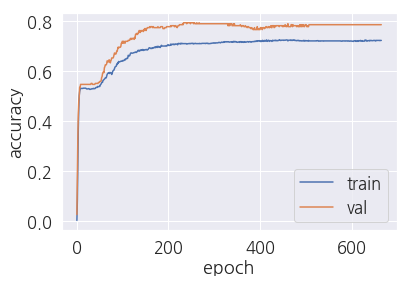

In [66]:
# 훈련소실과 검증손실 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

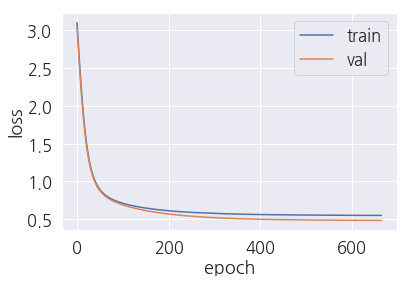

In [67]:
# 훈련소실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## SVM
- 원본데이터를 이용한 SVM
        1. 하이퍼 튜닝 하지 않은 데이터 모델
        2. 하이퍼 튜닝 하여 만든 데이터 모델
- 정제데이터를 이용한 SVM
        1. 하이퍼 튜닝 하지 않은 데이터 모델
        2. 하이퍼 튜닝 하여 만든 데이터 모델

In [39]:
# 데이터 로딩
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [40]:
# svm = SVC(C=1000)
# svm.fit(X_train, y_train)
# print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

### 원본데이터를 이용한 SVM

In [41]:
# 각 C 값에 따른 정확도 예측 코드 
# X = red[red.columns[:-1]].values
# y = red['quality'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# training_accuracy = []
# test_accuracy = []
# setting = range(6)
# for c in setting:
#     penalty=10**c
    
#     svm = SVC(C=penalty, kernel = "rbf", gamma = 0.7)
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # learning an SVM on the scaled training data
#     svm.fit(X_train_scaled, y_train)
#     pred = svm.predict(X_test_scaled)
    
#     # 훈련데이터 정확도
#     training_accuracy.append(svm.score(X_train_scaled, y_train))
#     # 일반화 정확도
#     test_accuracy.append(svm.score(X_test_scaled, y_test))
#     print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))
  
# plt.plot(setting, training_accuracy, label="훈련 정확도")
# plt.plot(setting, test_accuracy, label="테스트 정확도")
# plt.ylabel("정확도")
# plt.xticks(range(6), [10**c for c in range(6)])
# plt.xlabel('SVM')
# plt.ylabel('accuracy')
# plt.legend()
# plt.show()

### 하이퍼 튜닝 하지 않은 데이터 모델

In [42]:
X = red[red.columns[:-1]].values
y = red['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svm = SVC()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
pred = svm.predict(X_test_scaled)

# 훈련데이터 정확도
svm.score(X_train_scaled, y_train)
# 일반화 정확도
svm.score(X_test_scaled, y_test)
print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.7550


### 하이퍼 튜닝 하여 만든 데이터 모델

In [43]:
X = red[red.columns[:-1]].values
y = red['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svm = SVC(C=10, kernel = "rbf", gamma = 0.7)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
pred = svm.predict(X_test_scaled)

# 훈련데이터 정확도
svm.score(X_train_scaled, y_train)
# 일반화 정확도
svm.score(X_test_scaled, y_test)
print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.7775


### 정제데이터를 이용한 SVM

### 하이퍼 튜닝 하지 않은 데이터 모델

In [44]:
X = red_final[red_final.columns[:-1]].values
y = red_final['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
svm = SVC()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
pred = svm.predict(X_test_scaled)

# 훈련데이터 정확도
svm.score(X_train_scaled, y_train)
# 일반화 정확도
svm.score(X_test_scaled, y_test)
print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))


SVM test accuracy: 0.7400


### 하이퍼 튜닝 하여 만든 데이터 모델

In [45]:
X = red_final[red_final.columns[:-1]].values
y = red_final['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svm = SVC(C=10.001, kernel = "rbf", gamma = 0.53)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
pred = svm.predict(X_test_scaled)

# 훈련데이터 정확도
svm.score(X_train_scaled, y_train)
# 일반화 정확도
svm.score(X_test_scaled, y_test)
print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.7725


In [51]:
X = X_scaled.values
y = red_final['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svm = SVC(C=10.001, kernel = "rbf", gamma = 0.53)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
pred = svm.predict(X_test_scaled)

# 훈련데이터 정확도
svm.score(X_train_scaled, y_train)
# 일반화 정확도
svm.score(X_test_scaled, y_test)
print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.7725


In [52]:
# 교차검증
from sklearn.model_selection import cross_val_score
scores  = cross_val_score(svm, X, y)
scores 

array([0.665625  , 0.675     , 0.7875    , 0.721875  , 0.73354232])

### 하이퍼 파라미터 오토 튜닝 : GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = red_final[red_final.columns[:-1]].values
y = red_final['quality'].values
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=8, n_jobs=-1) #, cv=10
%time gs = gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_)

Wall time: 39.7 s
0.73106783919598
{'clf__C': 1000.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


In [48]:
# X = red_final[red_final.columns[:-1]].values
# y = red_final['quality'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# training_accuracy = []
# test_accuracy = []
# setting = range(6)
# for c in setting:
#     penalty=10**c
    
#     svm = SVC(C=10, kernel = "rbf", gamma = 0.7)
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # learning an SVM on the scaled training data
#     svm.fit(X_train_scaled, y_train)
#     pred = svm.predict(X_test_scaled)
    
#     # 훈련데이터 정확도
#     training_accuracy.append(svm.score(X_train_scaled, y_train))
#     # 일반화 정확도
#     test_accuracy.append(svm.score(X_test_scaled, y_test))
#     print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))
    
# plt.plot(setting, training_accuracy, label="훈련 정확도")
# plt.plot(setting, test_accuracy, label="테스트 정확도")
# plt.ylabel("정확도")
# plt.xticks(range(6), [10**c for c in range(6)])
# plt.xlabel('SVM')
# plt.ylim(0,1.5)
# plt.ylabel('accuracy')
# plt.legend()
# plt.show()

In [49]:
# X = red_final[red_final.columns[:-1]].values
# y = red_final['quality'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# svm = SVC(C=10.001, kernel = "rbf", gamma = 0.53)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# svm.fit(X_train_scaled, y_train)
# pred = svm.predict(X_test_scaled)

# # 훈련데이터 정확도
# svm.score(X_train_scaled, y_train)
# # 일반화 정확도
# svm.score(X_test_scaled, y_test)
# print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))

In [50]:
# X = red_final[red_final.columns[:-1]].values
# y = red_final['quality'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# svm = SVC(C=10, kernel = "rbf", gamma = 0.7)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # learning an SVM on the scaled training data
# svm.fit(X_train_scaled, y_train)

# # scoring on the scaled test set
# print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))